In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

Amostras foram obtidas de 3 máquinas de envase de perfume, conforme exibido a seguir. \
m1 = 150, 151, 152, 152, 151, 150 \
m2 = 153, 152, 148, 151, 149, 152 \
m3 = 156, 154, 155, 156, 157, 155 \
Com base nessas amostras, é correto afirmar que as 3 máquinas estão operando de forma idêntica, ou seja, produzindo perfumes com a mesma média? Nível de confiança: 95%.

H0: μ1 = μ2 = μ3 \
Ha: Médias não são iguais

In [2]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [3]:
stats.f_oneway(m1, m2, m3)

F_onewayResult(statistic=np.float64(22.264705882352935), pvalue=np.float64(3.2374085509077445e-05))

Conclusão: \
Como pValue < 0.05, rejeitamos a hipótese nula. Portanto, as médias são iguais.

É possível também obter a solução deste problema usando a biblioteca statsmodels. Vejamos como proceder.

In [6]:
oneway.anova_oneway((m1,m2,m3), use_var='equal')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = np.float64(22.264705882352892)
pvalue = np.float64(3.237408550907782e-05)
df = (2.0, np.float64(15.0))
df_num = 2.0
df_denom = np.float64(15.0)
nobs_t = np.float64(18.0)
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (np.float64(22.264705882352892), np.float64(3.237408550907782e-05))

As duas opções produzem resultados idênticos, porém o statsmodels provê um resultado mais detalhado.

### Exercício MPG
Usaremos o dataset mpg (miles per galon) do seaborn. Queremos descobrir se carros americanos, japoneses e europeus tem o mesmo consumo. Faremos um teste de hipótese com confiança de 95%.

H0: μus = μjp = μeu \
Ha: Médias não são iguais

In [12]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Queremo saber se os carros japoneses, americanos e europeus tem o mesmo consumo de combustível. Para tanto, precisamos agrupar os veículos por origem e obter a média de mpg (miles per galon).

In [17]:
japoneses = df[df['origin'] == 'japan']
americanos = df[df['origin'] == 'usa']
europeus = df[df['origin'] == 'europe']

mediaJaponeses = np.mean(japoneses['mpg'])
mediaAmericanos = np.mean(americanos['mpg'])
mediaEuropeus = np.mean(europeus['mpg'])

print(f'Média dos carros japoneses: {mediaJaponeses}')
print(f'Média dos carros americanos: {mediaAmericanos}')
print(f'Média dos carros europeus: {mediaEuropeus}')

Média dos carros japoneses: 30.450632911392404
Média dos carros americanos: 20.083534136546184
Média dos carros europeus: 27.89142857142857


Vamos plotar boxplots de mpg e observar o resultado.

<Axes: xlabel='origin', ylabel='mpg'>

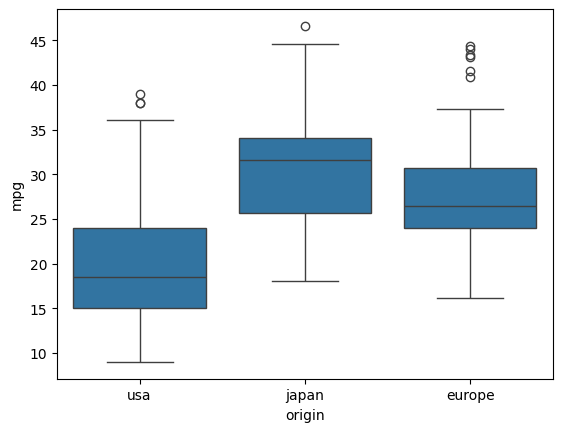

In [16]:
sns.boxplot(x='origin', y='mpg', data=df)

Analisando os resultados, está claro que os carros japoneses são os mais econômicos e os carros americanos, os mais gastões. Mas notem o número de cilindros. Os carros americanos tem, em média, muito mais cilindros que os carros europeus e japoneses. Para evitar esse viés, vamos trabalhar apenas com os veículos de 4 cilindros.

<Axes: xlabel='origin', ylabel='mpg'>

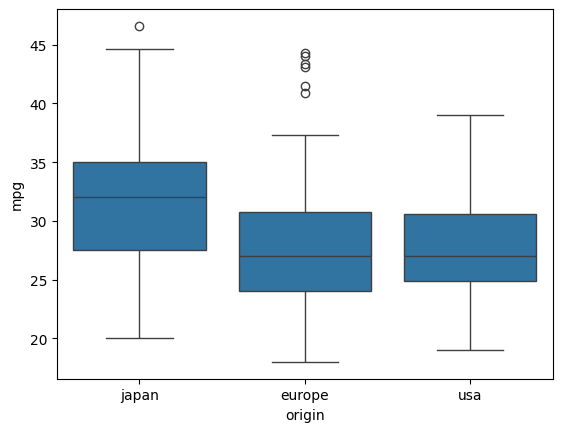

In [20]:
df2 = df[df['cylinders'] == 4]
sns.boxplot(x='origin', y='mpg', data=df2)

Ao considerar carros de 4 cilindros, ainda temos os carros japoneses como mais econômicos, porém vemos uma quase igualdade entre os carros americanos e europeus. Vamos realizar o teste ANOVA para saber se temos de fato uma diferença nas médias de consumo.

In [22]:
eu = df2[df2['origin'] == 'europe']
us = df2[df2['origin'] == 'usa']
jp = df2[df2['origin'] == 'japan']

In [23]:
stats.f_oneway(eu['mpg'], us['mpg'], jp['mpg'])

F_onewayResult(statistic=np.float64(9.411845545485605), pvalue=np.float64(0.00012379894210177303))

Conclusão: \
Como pValue < 0.05, rejeitamos a hipótese nula. A média de consumo dos carros americanos, europeus e japoneses não é a mesma.